## Market Basket Analysis Project

In [60]:
pip install mlxtend

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules
import squarify
import networkx as nx

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
groceries=pd.read_csv("C:/Users/USER/OneDrive/Desktop/MTH552A Project/Groceries dataset/Groceries data.csv")
groceries

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [64]:
groceries.drop(['Date'], axis=1, inplace=True)
groceries

,Member_number,itemDescription,year,month,day,day_of_week
0,1808,tropical fruit,2015,7,21,1
1,2552,whole milk,2015,5,1,4
2,2300,pip fruit,2015,9,19,5
3,1187,other vegetables,2015,12,12,5
4,3037,whole milk,2015,1,2,4
...,...,...,...,...,...,...
38760,4471,sliced cheese,2014,8,10,6
38761,2022,candy,2014,2,23,6
38762,1097,cake bar,2014,4,16,2
38763,1510,fruit/vegetable juice,2014,3,12,2


In [65]:
groceries.groupby('itemDescription').size().sort_values(ascending=False)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Length: 167, dtype: int64

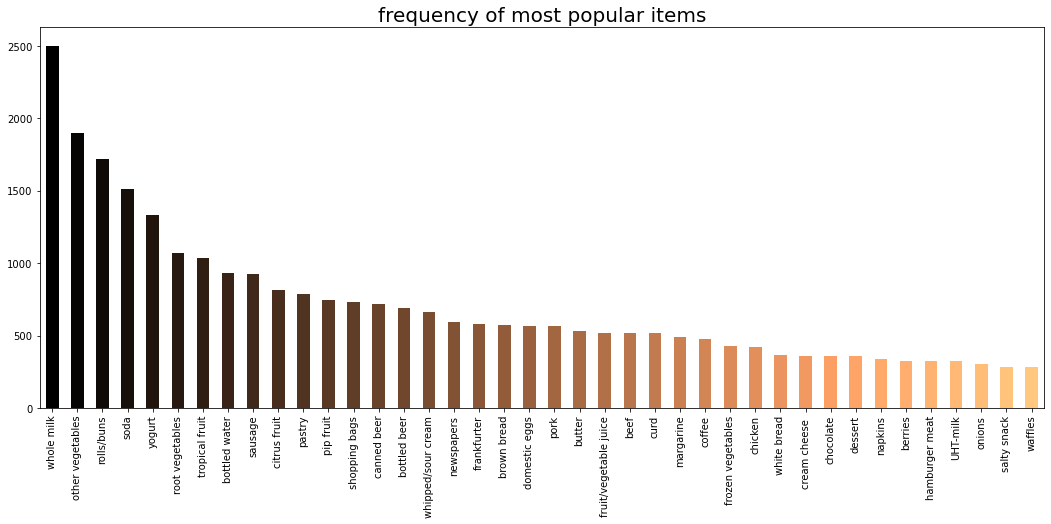

In [82]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

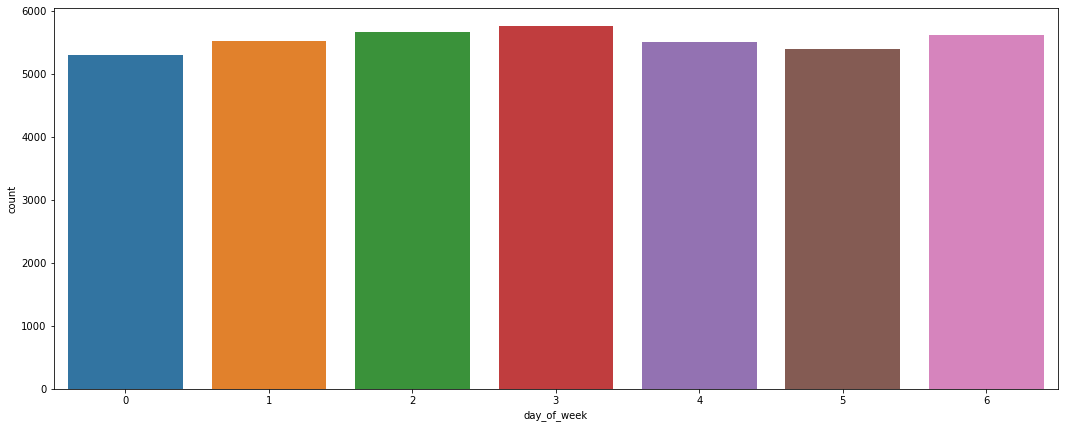

In [67]:
sns.countplot(groceries['day_of_week'] )

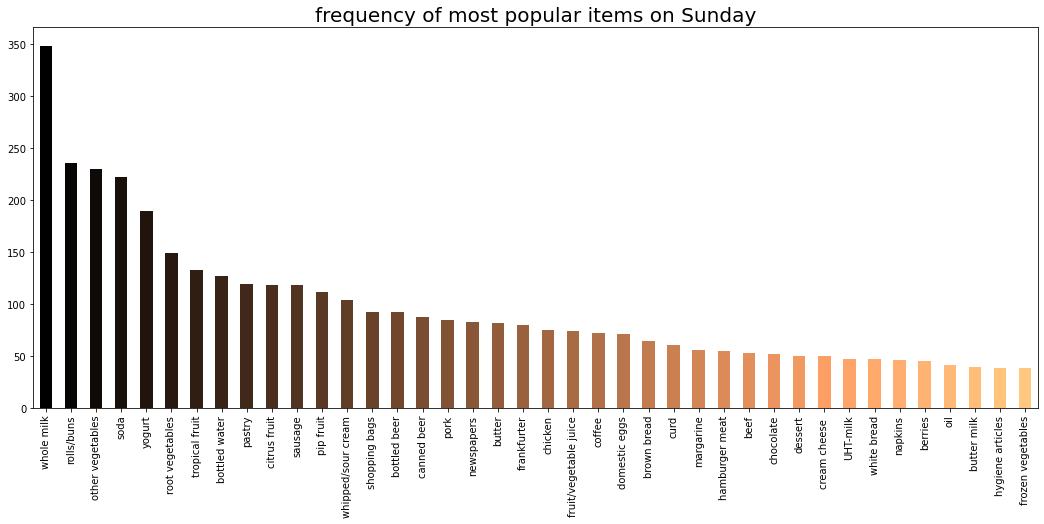

In [68]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==0).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Sunday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

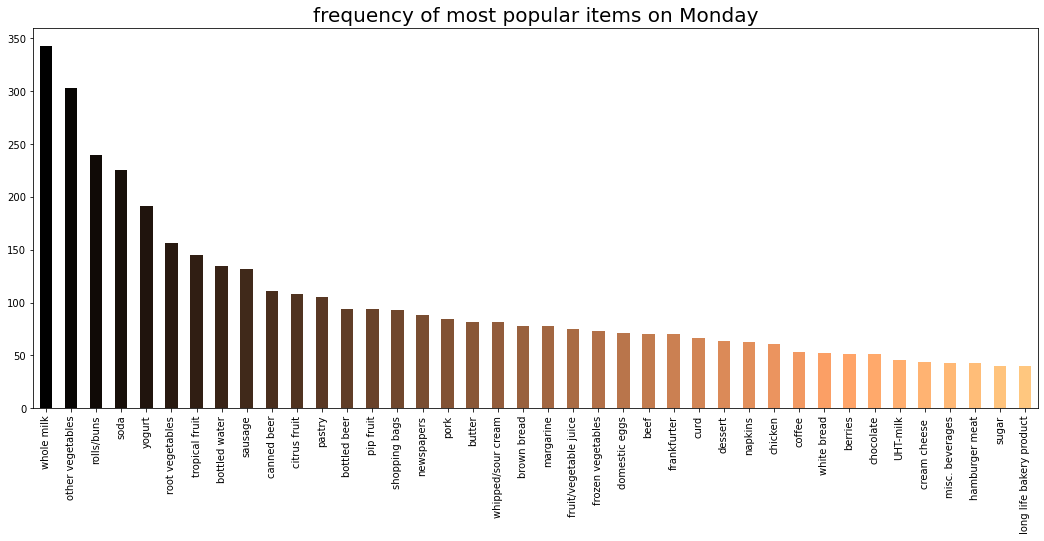

In [69]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==1).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Monday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

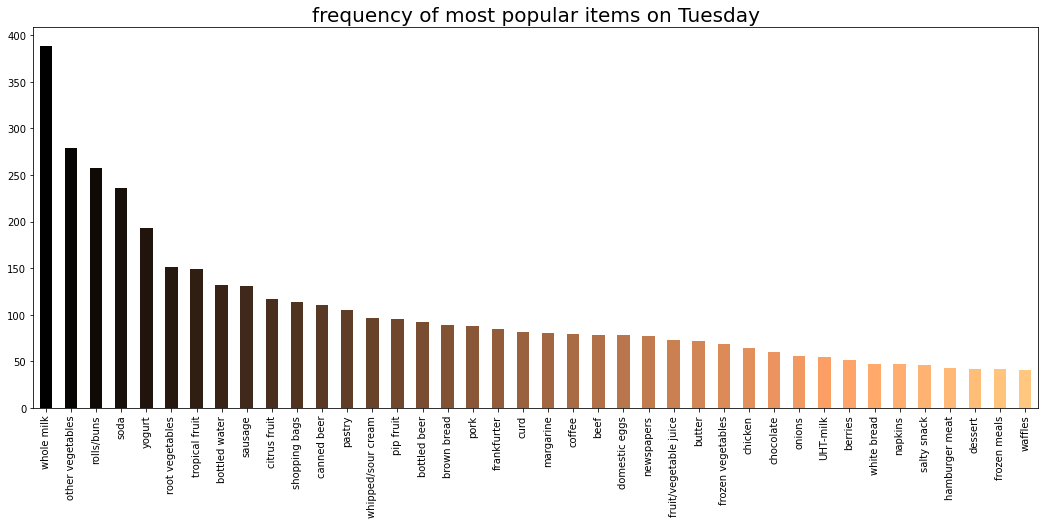

In [70]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==2).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Tuesday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

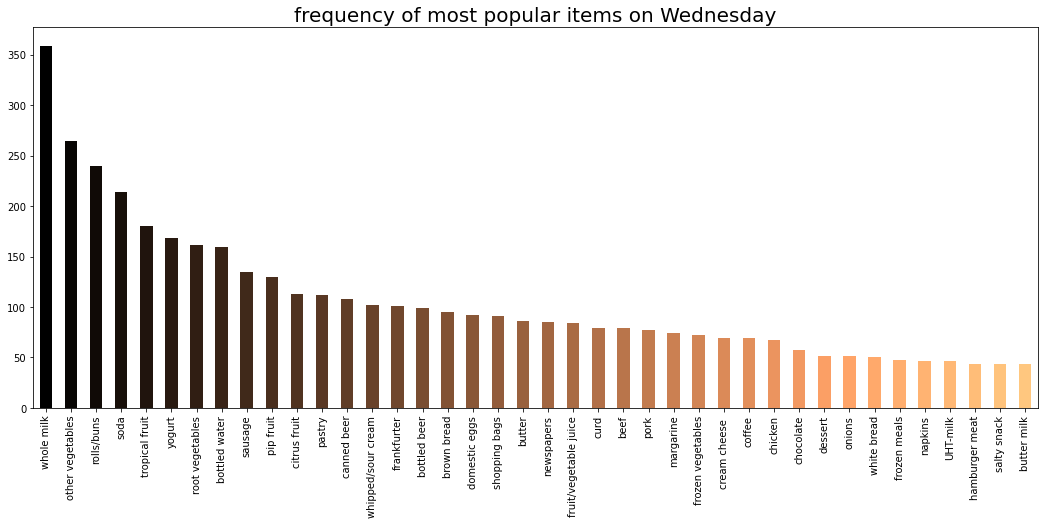

In [71]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==3).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Wednesday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

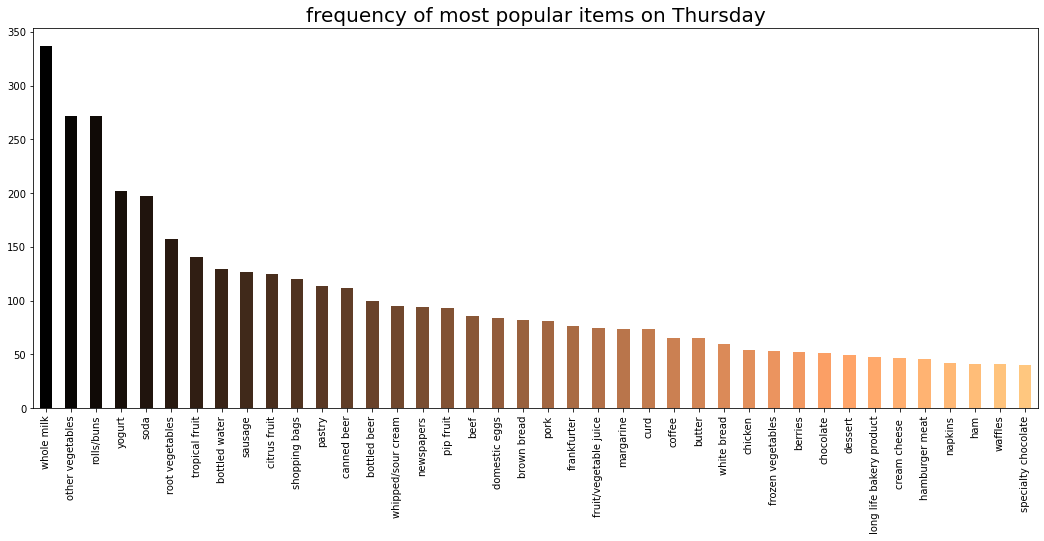

In [72]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==4).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Thursday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

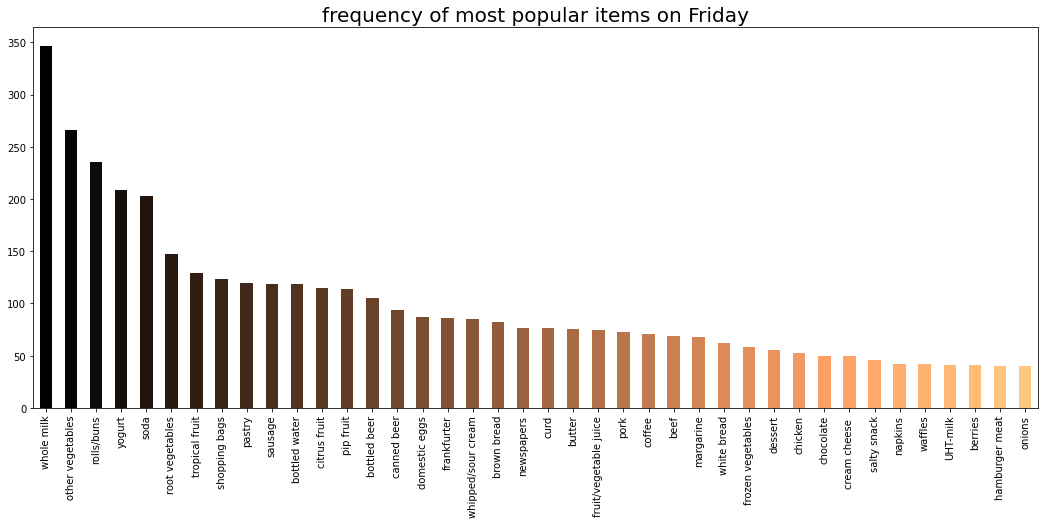

In [73]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==5).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Friday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

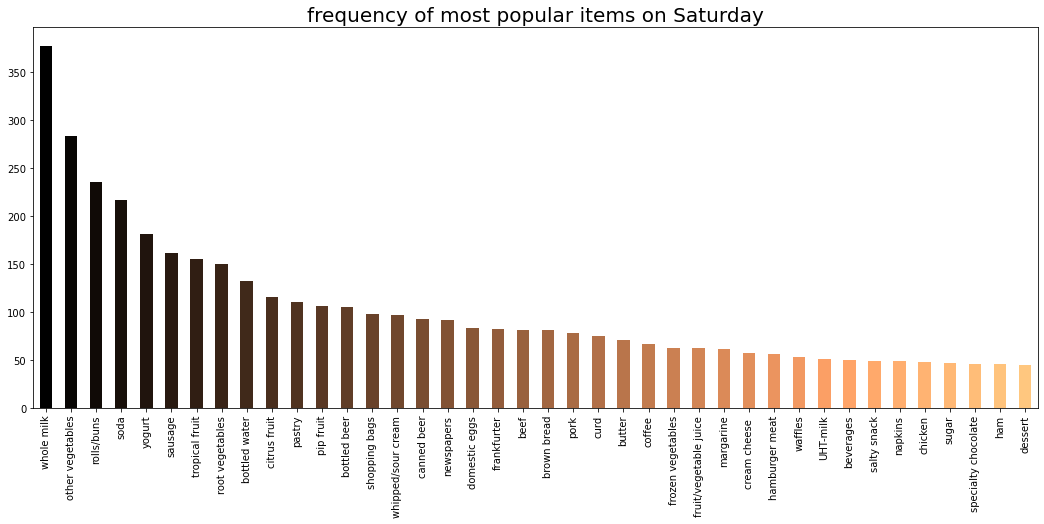

In [74]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
groceries['itemDescription'].where(groceries['day_of_week']==6).value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items on Saturday', fontsize = 20)
plt.xticks(rotation = 90 )
#plt.grid()
plt.show()

In [75]:
groceries['date'] = pd.to_datetime(groceries[['year', 'month', 'day']])
groceries['member_date'] = list(zip(groceries['Member_number'], groceries['date'].dt.date))
groceries['quantity'] = 1
groceries

,Member_number,itemDescription,year,month,day,day_of_week,date,member_date,quantity
0,1808,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1
1,2552,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1
2,2300,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1
3,1187,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1
4,3037,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1
...,...,...,...,...,...,...,...,...,...
38760,4471,sliced cheese,2014,8,10,6,2014-08-10,"(4471, 2014-08-10)",1
38761,2022,candy,2014,2,23,6,2014-02-23,"(2022, 2014-02-23)",1
38762,1097,cake bar,2014,4,16,2,2014-04-16,"(1097, 2014-04-16)",1
38763,1510,fruit/vegetable juice,2014,3,12,2,2014-03-12,"(1510, 2014-03-12)",1


In [76]:
basket = groceries.groupby(['member_date', 'itemDescription'])['quantity'].count().unstack().fillna(0)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
member_date,,,,,,,,,,,,,,,,,,,,,
"(1000, 2014-06-24)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(1000, 2015-03-15)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
"(1000, 2015-05-27)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1000, 2015-07-24)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1000, 2015-11-25)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(4999, 2015-05-16)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(4999, 2015-12-26)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(5000, 2014-09-03)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
def convert_values(value):
    if value >= 1:
        return 1
    else:
        return 0

basket = basket.applymap(convert_values)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
member_date,,,,,,,,,,,,,,,,,,,,,
"(1000, 2014-06-24)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
"(1000, 2015-03-15)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
"(1000, 2015-05-27)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1000, 2015-07-24)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1000, 2015-11-25)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(4999, 2015-05-16)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"(4999, 2015-12-26)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(5000, 2014-09-03)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
basket_items = apriori(basket, min_support = 0.005, use_colnames = True, max_len = 2)
basket_items

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(whole milk, soda)"
122,0.005814,"(yogurt, soda)"
123,0.008220,"(whole milk, tropical fruit)"
124,0.005213,"(yogurt, tropical fruit)"


In [79]:
basket_items['length'] = basket_items['itemsets'].apply(lambda x: len(x))
basket_items

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.008087,(baking powder),1
2,0.033950,(beef),1
3,0.021787,(berries),1
4,0.016574,(beverages),1
...,...,...,...
121,0.011629,"(whole milk, soda)",2
122,0.005814,"(yogurt, soda)",2
123,0.008220,"(whole milk, tropical fruit)",2
124,0.005213,"(yogurt, tropical fruit)",2


In [80]:
rules = association_rules(basket_items, metric = "confidence", min_threshold=0.13)
rules.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
8,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
5,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
2,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
4,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958
3,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
7,(pork),(whole milk),0.037091,0.157923,0.005012,0.135135,0.855703,-0.000845,0.973652
6,(pip fruit),(whole milk),0.049054,0.157923,0.006616,0.134877,0.854071,-0.001130,0.973362
1,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040
9,(shopping bags),(whole milk),0.047584,0.157923,0.006349,0.133427,0.844887,-0.001166,0.971732
